<a href="https://colab.research.google.com/github/Rhea-fer/Python-Projects/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries**



In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
data=pd.read_csv('/content/sample_data/UberDataset.csv')
data.head()#first 5 rows

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
data.tail()#last 5 rows

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
#Checking For Missing Values
data.isnull().any()

,0
START_DATE,False
END_DATE,True
CATEGORY,True
START,True
STOP,True
MILES,False
PURPOSE,True


In [ ]:
data.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [ ]:
#Dropping NaN values
data=data.dropna()
data.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


In [ ]:
print(data.shape)

(653, 7)


In [ ]:
print("Column Names:", data.columns)

Column Names: Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [ ]:
data.rename(columns=lambda x: x.strip(), inplace=True)#cleaning the column names

In [ ]:
#Converts Date Columns
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce', format="%m/%d/%Y %H:%M")
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce', format="%m/%d/%Y %H:%M")
data = data.dropna(subset=['START_DATE'])#drops invalid start date data

In [ ]:
#Feature Engineering
#Extracts time-related features from START_DATE
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in data['START_DATE']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[x.dayofweek])

data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [ ]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2,Meeting,13,13,2,1,Wednesday
24,2016-01-13 15:00:00,2016-01-13 15:28:00,Business,Gulfton,Downtown,11.8,Meeting,15,13,2,1,Wednesday
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit,16,14,3,1,Thursday
26,2016-01-14 21:39:00,2016-01-14 21:45:00,Business,Eagan Park,Jamestown Court,3.9,Errand/Supplies,21,14,3,1,Thursday
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,0,15,4,1,Friday


In [ ]:
#Given Categories
data['CATEGORY'].value_counts()

,count
CATEGORY,
Business,386
Personal,6


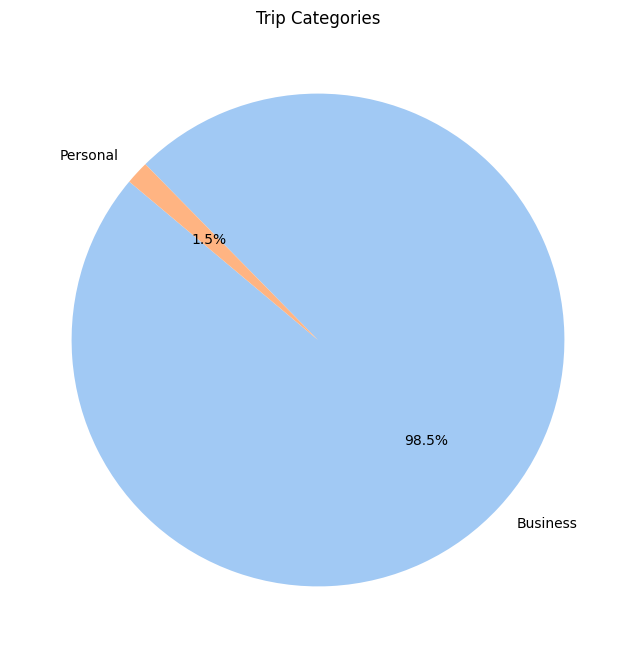

In [ ]:
category_counts = data['CATEGORY'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Trip Categories')
plt.show()

<Axes: xlabel='HOUR', ylabel='DAY'>

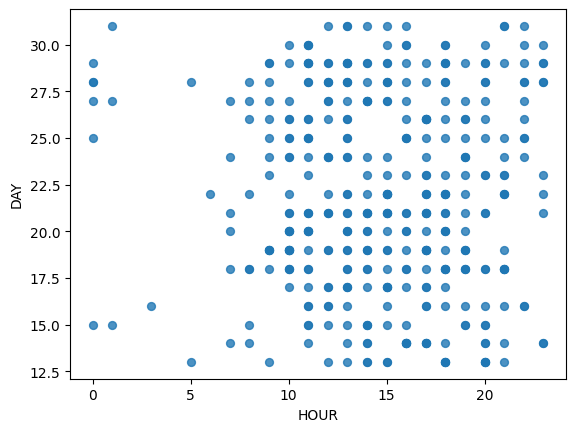

In [ ]:
#How many hours do people travel in a day
#To visualize the relationship between the hour of the trip and the day.
data.plot(kind='scatter', x='HOUR', y='DAY', s=32, alpha=.8)

Text(0.5, 1.0, 'Distance Distibution')

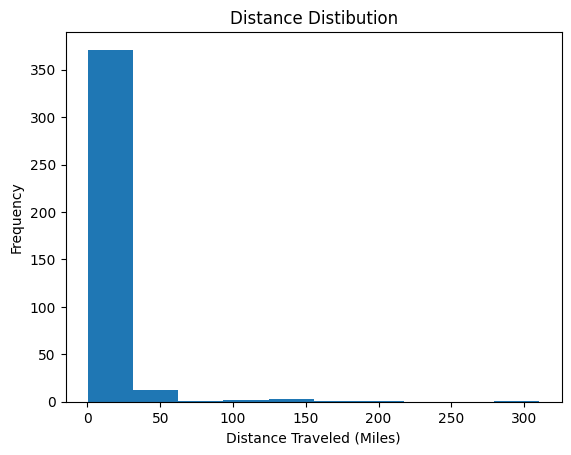

In [ ]:
#How long do people travel with Uber?
data['MILES'].plot.hist()
plt.xlabel('Distance Traveled (Miles)')
plt.title('Distance Distibution')

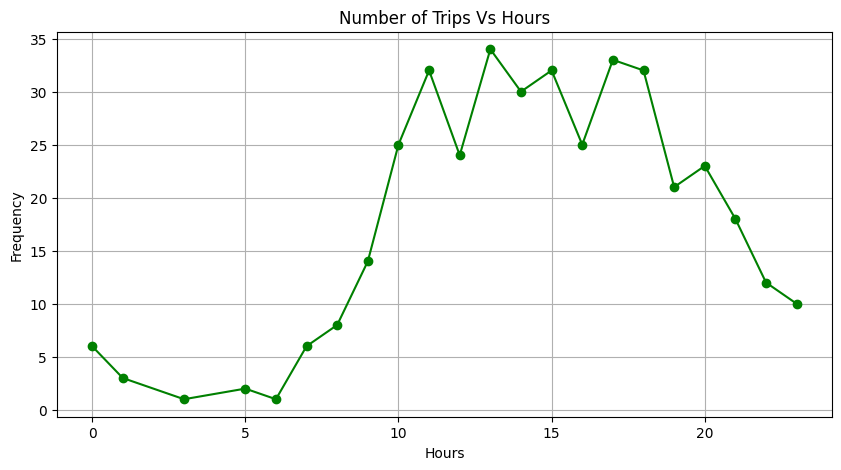

In [ ]:
#What is the frquency of trips according to hours?
#Extracts hours from START_DATE and calculates the frequency of trips for each hour.
hours.sort_index().plot(kind='line', color='green', figsize=(10, 5), marker='o')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')
plt.grid(True)
plt.show()

<Axes: xlabel='PURPOSE'>

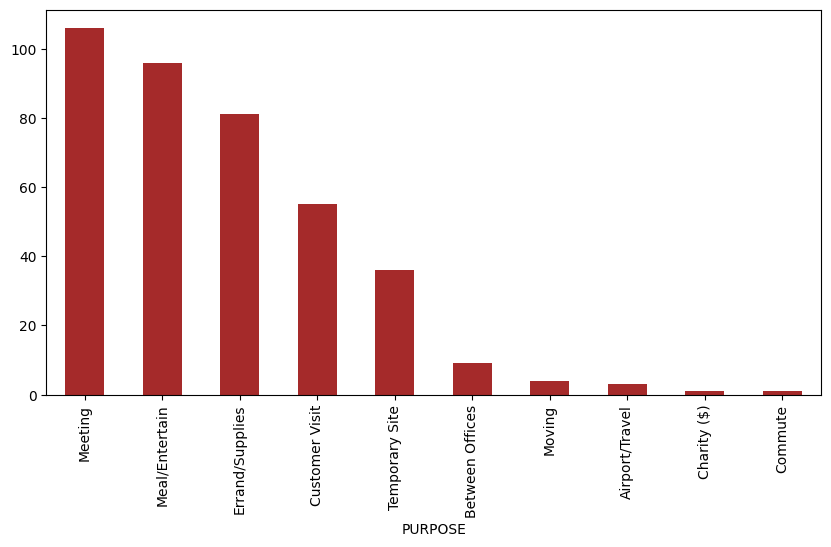

In [ ]:
#What is the Purpose Of Trips?
data['PURPOSE'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

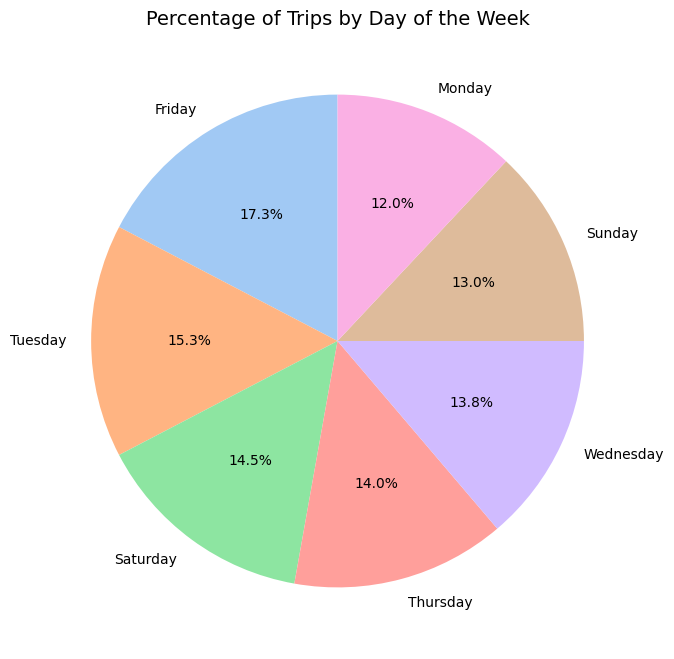

In [ ]:
#Which Day Has The Highest Number Of Trips
weekday_counts = data['WEEKDAY'].value_counts()
weekday_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of Trips by Day of the Week', fontsize=14)
plt.ylabel('')  # Remove default ylabel
plt.show()

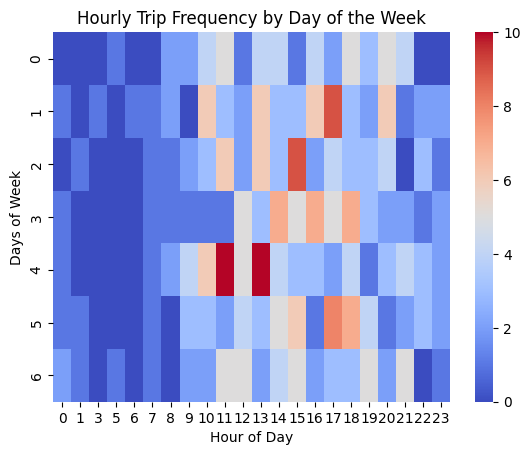

In [ ]:
#Hourly Trip Frequencies by day of the Week
#It is to visualize the frequency of Uber trips across different hours of the day (HOUR) and days of the week (DAY_OF_WEEK).
heatmap_data = data.pivot_table(index='DAY_OF_WEEK', columns='HOUR', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Hourly Trip Frequency by Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Days of Week')
plt.show()

Text(0, 0.5, 'Number of Trips')

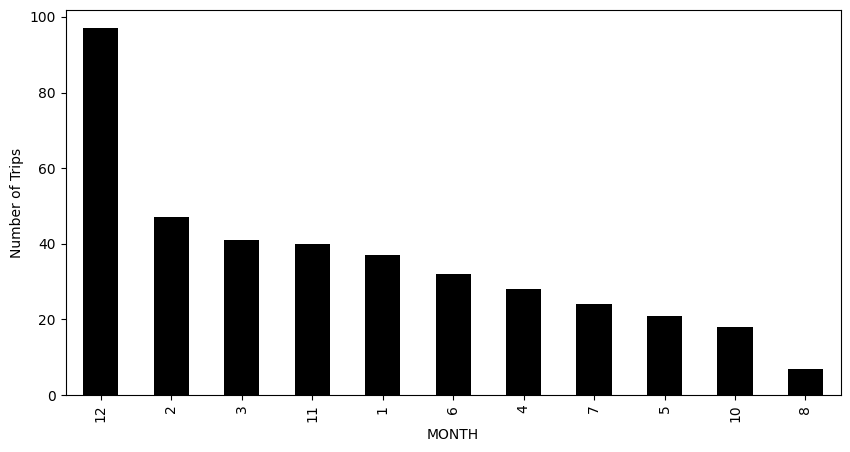

In [ ]:
#What Are The Trips In The Month?
#Number of trips each month
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')
plt.ylabel('Number of Trips')

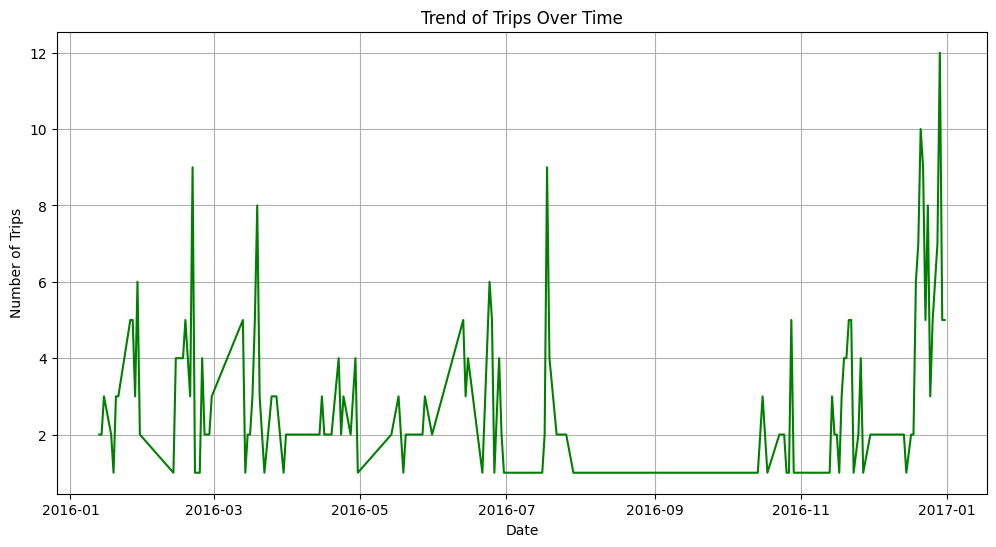

In [ ]:
#What are Trips over a period of time
data['START_DATE'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(12, 6), color='green')
plt.title('Trend of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

<Axes: xlabel='START'>

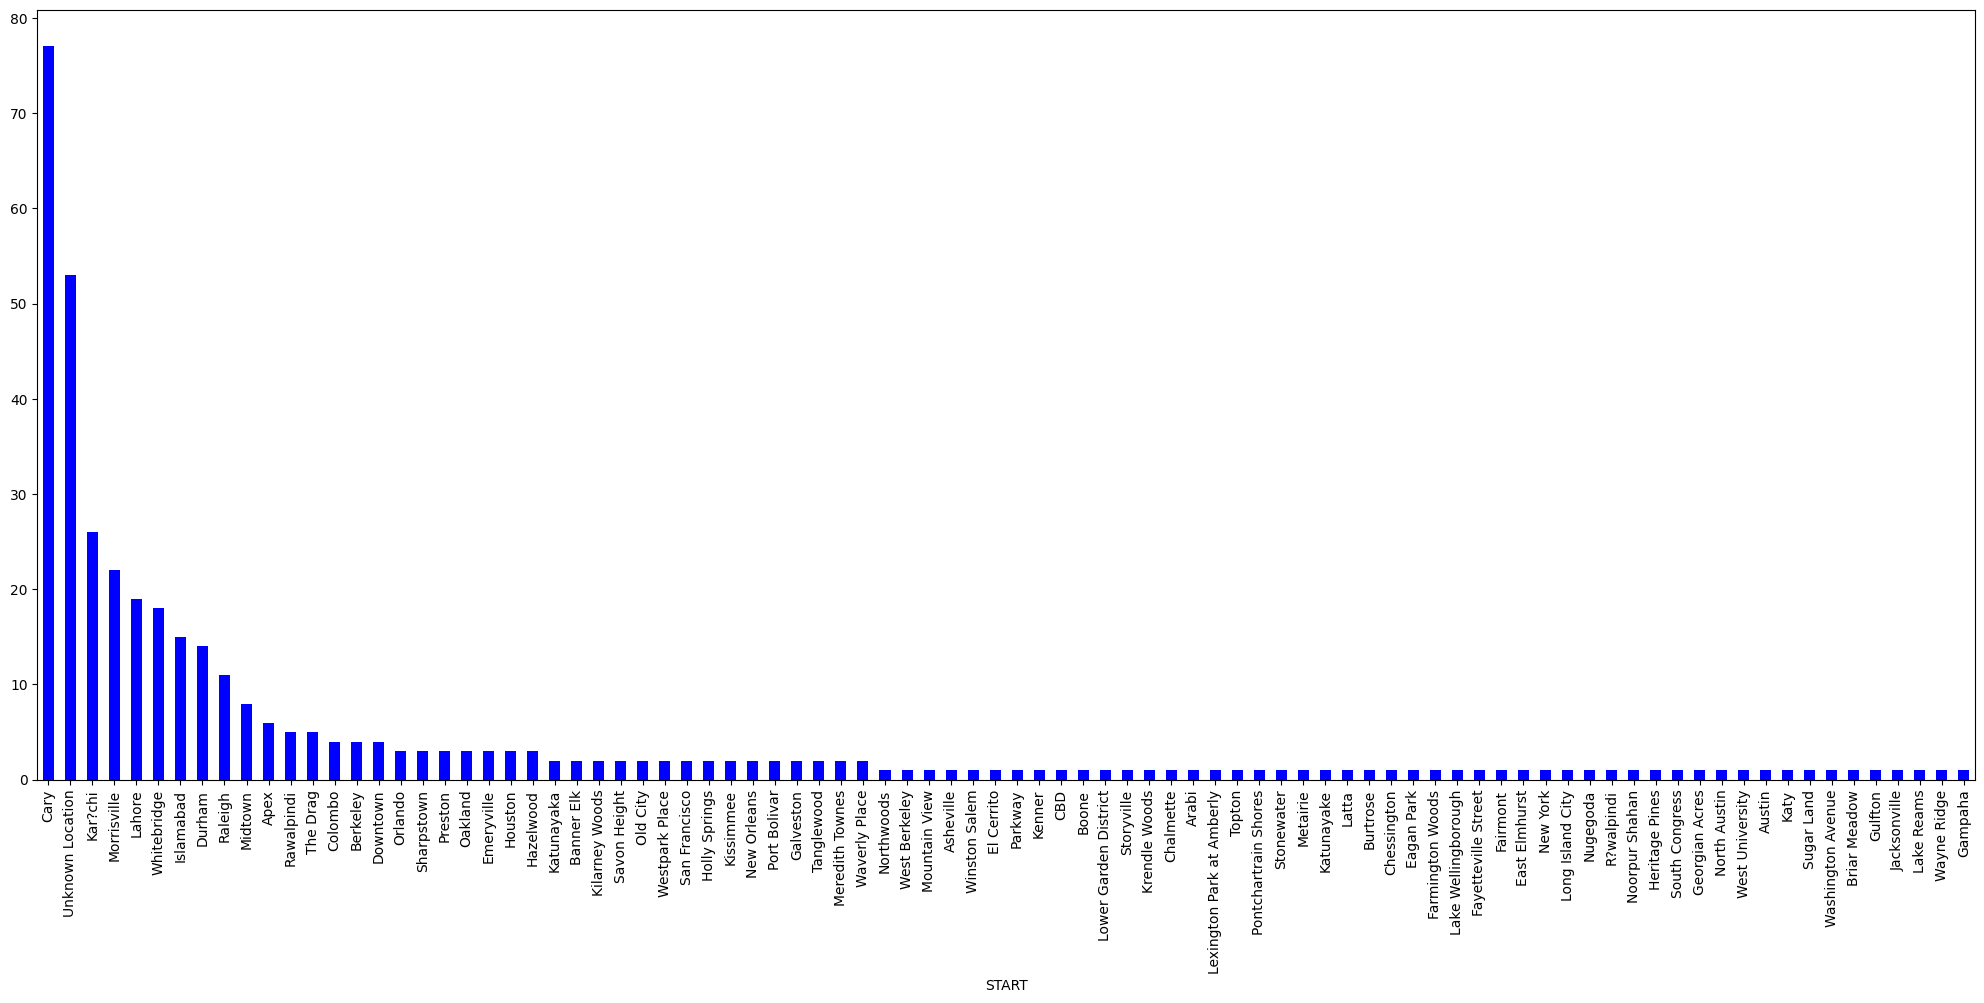

In [ ]:
#Where do people start their Trips from?
data['START'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

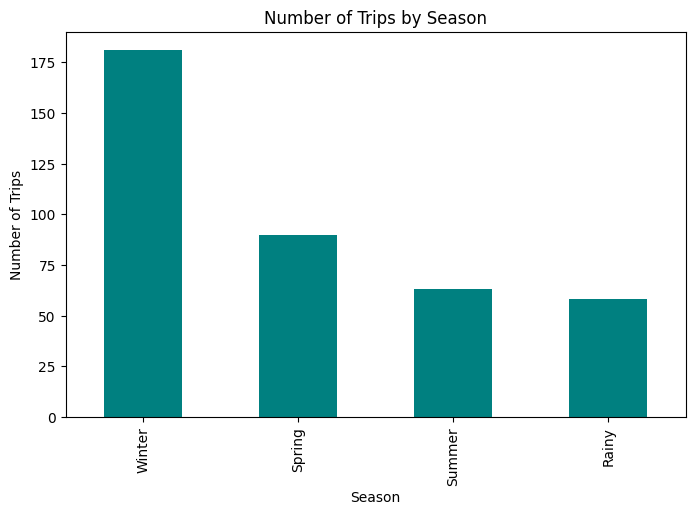

In [ ]:
#What is the seasonal trend observed in the trips?
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Rainy'

data['SEASON'] = data['MONTH'].apply(get_season)
data['SEASON'].value_counts().plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Number of Trips by Season')
plt.xlabel('Season')
plt.ylabel('Number of Trips')
plt.show()

# **Conclusion**

**Hourly Trip Analysis**

1.Peak Hours: The busiest hours for Uber trips are typically during the morning (e.g., 7–9 AM) and evening (e.g., 5–8 PM) rush hours.

2.Off-Peak Hours: Fewer trips occur during late-night hours (e.g., 1–5 AM), except on weekends, which might have higher activity due to leisure travel.


**Monthly Trends**

1.Summer months have higher trips due to vacations.

2.December might see spikes due to holiday celebrations.



**Purpose of Trips**

1.Business trips might dominate weekdays.

2.Social trips could spike on weekends.